In [55]:
import networkx as nx
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
from collections import defaultdict

In [63]:
#df = pd.read_csv('valuesAdjList.csv')
df = pd.read_csv('data/valuesMatrix.csv')
df.columns
df.head(10)

,name,lvl
0,none,1
1,little,2
2,some,3
3,more,4
4,all,5
5,ACCEPTANCE,2
6,ACHIEVEMENT,3
7,ADVENTURE,4
8,ART,4
9,ATTRACTIVENESS,4


In [64]:
nameDict = df['name']
nameDict[0]
df = df.drop('name',axis=1)
# # range of lvls 1-5
df[df['lvl'] < 5] -= 1
# newCol = df['lvl'].to_numpy()
# newCol = [[x] for x in newCol]
# df['lvl'] = newCol
df.head(10)

,lvl
0,0
1,1
2,2
3,3
4,5
5,1
6,2
7,3
8,3
9,3


pandas.core.series.Series

In [81]:
adjDictScale = defaultdict(list)
adjDictValue = defaultdict(list)

#DICT
for idx, name in enumerate(nameDict):
    # connect scale nodes to create complete graph
    if idx < 4:
        adjDictValue[idx] = (idx+1, idx+1, name)  

    else:
        adjDictValue[idx] = (idx+1,df.iloc[idx][0], name)



# Array

# adjListScale = list()
# adjListValue = list()

# for idx, name in enumerate(nameDict):
#     if idx < 5:
#         adjListScale.append( (idx ,df.iloc[idx][0]) )
#     else:
#         adjListValue.append((idx, df.iloc[idx][0]))
        

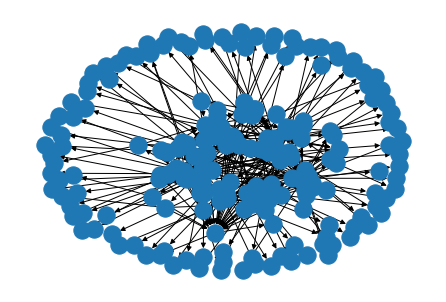

In [79]:
# valuesNumpyArray = df.to_numpy()
# valuesNumpyArray[0:10]
G1 = nx.DiGraph(adjDictValue)
G1.remove_edges_from(nx.selfloop_edges(G))


G.add_nodes_from(adjDictScale, bipartite=0)
G.add_nodes_from(adjDictValue, bipartite=1)
nx.draw(G, with_labels=False)

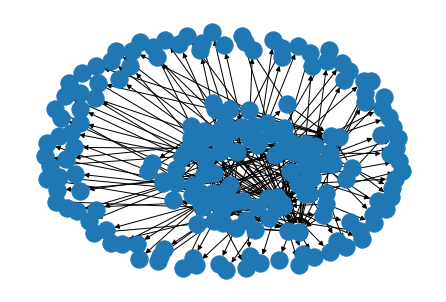

In [80]:
nx.draw(G1)

{0: (0, 1, 'none'),
 1: (1, 2, 'little'),
 2: (2, 3, 'some'),
 3: (3, 4, 'more'),
 4: (4, 4, 'all'),
 5: (5, 1, 'ACCEPTANCE'),
 6: (6, 2, 'ACHIEVEMENT'),
 7: (7, 3, 'ADVENTURE'),
 8: (8, 3, 'ART'),
 9: (9, 3, 'ATTRACTIVENESS'),
 10: (10, 4, 'ACCURACY'),
 11: (11, 0, 'AUTHORITY'),
 12: (12, 4, 'AUTONOMY'),
 13: (13, 3, 'BEAUTY'),
 14: (14, 2, 'BELONGING'),
 15: (15, 3, 'CARING'),
 16: (16, 2, 'CHALLENGE'),
 17: (17, 2, 'COMFORT'),
 18: (18, 2, 'COMMITMENT'),
 19: (19, 3, 'COMPASSION'),
 20: (20, 3, 'COMPLEXITY'),
 21: (21, 2, 'COMPROMISE'),
 22: (22, 1, 'CONTRIBUTION'),
 23: (23, 2, 'COOPERATION'),
 24: (24, 4, 'COURAGE'),
 25: (25, 3, 'COURTESY'),
 26: (26, 3, 'CREATIVITY'),
 27: (27, 3, 'CURIOSITY'),
 28: (28, 3, 'DEPENDABILITY'),
 29: (29, 3, 'DILIGENCE'),
 30: (30, 2, 'DUTY'),
 31: (31, 3, 'ECOLOGY'),
 32: (32, 1, 'EXCITEMENT'),
 33: (33, 3, 'FAITHFULNESS'),
 34: (34, 0, 'FAME'),
 35: (35, 2, 'FAMILY'),
 36: (36, 3, 'FITNESS'),
 37: (37, 3, 'FLEXIBILITY'),
 38: (38, 4, 'FORGIVENESS'

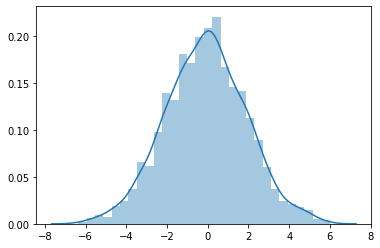

In [19]:
# passing in normally distributed training samples
# S = [ (0,value 0), (1,value1), (0.5, value1), ... Nth]
# S`= [value 0`, value 1`]

z = np.random.normal(loc=0, scale=2, size=(1000, 2))
#sns.distplot(z)

G = nx.DiGraph(adjDictValue)

def feel_baseLayer(data:list, layer:object) -> object:
    # python >= 3.9 = layer | data
    # newCol = df['lvl'].to_numpy()
    # newCol = [[x] for x in newCol]
    # df['lvl'] = newCol
    
    updated_layer = {**layer, **data} 
    return updated_layer
    
    
feel_baseLayer(adjDictValue, adjDictValue)